# Веб - запросы
Процесс получения/извлечения информации с веб-ресурсов в интернете называется web-scraping (рус. веб-скрейпинг/веб-скрапинг). Веб-скрапинг может быть проделан вручную пользователем компьютера, однако этот термин обычно связывают с автоматизированными процессами, реализованными с помощью кода.

Какие данные можно извлечь в процессе веб-скрапинга?

* цены на товары конкурентов для оптимизации своей стратегии ценообразования;
* сообщения в социальных медиа, по которым можно отслеживать тренды в той или иной области;
* отзывы о товарах/услугах компании на различных площадках, которые можно впоследствии анализировать;
* контактные данные пользователей соцсетей или форумов для дальнейшего взаимодействия с этими пользователями;
* и т.д.

Таким образом клиент отправляет серверу запрос который в себе содержит:
1) URL
2) Техническая информация (например, метод запроса)
3) Дополнительные даннные

В ответ от сервера приходят:
1) Код статуса ответа
2) Текст в нужном формате
3) Прочая информация

## Методы запросов в протоколе HTTP
Чаще всего используются Get и Post

Get: Получение ресурса

Метод GET запрашивает информацию из указанного источника и не может влиять на его содержимое. Запрос доступен для кэширования данных (то есть для сохранения, восстановления и дальнейшего использования) и добавления в закладки. Длина запроса ограничена (максимальная длина — 2048 символов).

Post - создание ресурса

Метод POST используется для отправки данных, которые могут оказывать влияние на содержимое ресурса. В отличие от метода GET, запросы POST не могут быть кэшированы, они не остаются в истории браузера и их нельзя добавить в закладки. Длина запроса POST не ограничивается.

Пример POST-запроса, отправляемого через форму запроса

[Больше информации о методах:](https://developer.mozilla.org/ru/docs/Web/HTTP/Methods)


# Библиотека requests
В стандартной библиотеке Python для отправки веб-запросов существует функция urllib2, но большинство разработчиков используют стороннюю библиотеку requests (c англ. запросы), потому что её работа более стабильна, а созданный с её помощью код получается проще. Поэтому мы будем работать с библиотекой requests, а urllib2 рассматривать не будем.
для начала импортируем библиотеку, чтобы потом получить курсы валют


In [3]:
import requests
url = 'https://www.cbr-xml-daily.ru/daily_json.js' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response
print(response) # Выводим значение response на экран как объект
print(response.status_code) # Выводим числовое значение response на экран

<Response [200]>
200


## Работаем с ответом
мы сделали запрос и получили корректный ответ (код статуса — 200). Дальнейшую работу производим с результатом запроса к ресурсу Курсы валют ЦБ РФ в XML и JSON.


In [4]:
print(response.text) # Выводим содержимое атрибута text переменной response на экран

{
    "Date": "2025-01-23T11:30:00+03:00",
    "PreviousDate": "2025-01-22T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2025\/01\/22\/daily_json.js",
    "Timestamp": "2025-01-22T20:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 61.5727,
            "Previous": 62.4451
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 57.812,
            "Previous": 58.7813
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов",
            "Value": 120.8751,
            "Previous": 122.8417
        },
        "AMD": {

Для того чтобы удобно было работать с полученной информацией, нам необходимо преобразовать строку в словарь. В объект ответа Response  из библиотеки requests уже встроен метод json() .

Импортируем функцию pprint(), применим к полученному ответу метод json() и выведем полученный результат на экран:

In [5]:
from pprint import pprint # Импортируем функцию pprint()
import json # Импортируем модуль json
currencies = response.json() # Применяем метод json()
pprint(currencies) # Выводим результат на экран

{'Date': '2025-01-23T11:30:00+03:00',
 'PreviousDate': '2025-01-22T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2025/01/22/daily_json.js',
 'Timestamp': '2025-01-22T20:00:00+03:00',
 'Valute': {'AED': {'CharCode': 'AED',
                    'ID': 'R01230',
                    'Name': 'Дирхам ОАЭ',
                    'Nominal': 1,
                    'NumCode': '784',
                    'Previous': 27.2099,
                    'Value': 26.7612},
            'AMD': {'CharCode': 'AMD',
                    'ID': 'R01060',
                    'Name': 'Армянских драмов',
                    'Nominal': 100,
                    'NumCode': '051',
                    'Previous': 25.0547,
                    'Value': 24.6477},
            'AUD': {'CharCode': 'AUD',
                    'ID': 'R01010',
                    'Name': 'Австралийский доллар',
                    'Nominal': 1,
                    'NumCode': '036',
                    'Previous': 62.4451,
            

In [6]:
pprint(currencies['Valute']['EUR']) # Выводим на экран информацию о валюте евро

{'CharCode': 'EUR',
 'ID': 'R01239',
 'Name': 'Евро',
 'Nominal': 1,
 'NumCode': '978',
 'Previous': 103.2856,
 'Value': 103.2419}


In [7]:
print(currencies['Valute']['CZK']['Name'])

Чешских крон


# Парсинг сайтов
Ресурс, с которым мы работали в предыдущем юните, возвращал ответ о текущем курсе валют в удобном, структурированном формате, из которого было легко извлечь необходимую информацию. Довольно часто для получения информации приходится обращаться напрямую к HTML-страницам.


Для примера рассмотрим страницу (https://nplus1.ru/news/2021/10/11/econobel2021), содержащую статью с информацией о присуждении Нобелевской премии по экономике в 2021 году, и попробуем извлечь из неё заголовок статьи, опубликованной на странице, дату публикации, а также текст статьи.

Получить содержимое страницы в большинстве случаев несложно, гораздо труднее извлечь из HTML-кода нужную информацию.

## Основы HTML
HTML (англ. HyperText Markup Language, рус. язык гипертекстовой разметки) — стандартизированный язык разметки документов в интернете. Большинство веб-страниц содержат описание разметки на языке HTML. Язык HTML интерпретируется браузерами. Полученный в результате интерпретации текст отображается на экране монитора компьютера или мобильного устройства.

HTML позволяет создавать макет страницы, разбивая её на блоки: мы можем поместить содержимое посередине страницы, сбоку и т. п.

Кроме того, HTML используется для описания форматирования. Например, с его помощью мы можем указать, какая часть текста должна отображаться крупным шрифтом как заголовок, какая — курсивом, а какая — как обычный текст.

HTML является близким родственником уже знакомого вам формата XML. Разметка на языке HTML делается с помощью так называемых тегов, которые помещаются в угловые скобки, и применяется к элементам, заключённым внутри них. Посмотрите на примеры:

```
<h2> Это заголовок второго уровня </h2>
<div> А это обычный текст </div>
```

У корректной HTML-страницы есть заголовок и тело страницы. В заголовке (в тегах <head> … </head>)  размещается техническая информация, подключаются скрипты и стили. В теле <body> … </body> находятся текст и данные, которые непосредственно отображаются на странице в браузере.

Разметка небольшой страницы выглядит примерно так:

```
<!DOCTYPE html>
<html lang="ru">
    <head>
        <title>Название страницы</title>
        <meta charset="UTF-8">
    </head>
    <body>
        <h1> Это заголовок страницы </h1>
        <p> Какой-то текст </p>
    </body>
</html>
```

Обратите внимание, что теги образуют иерархическую структуру, то есть одни теги расположены внутри других. В примере выше тег <p> … </p> находится внутри тега <body> … </body>.

Кроме того, у тегов могут быть атрибуты, которые пишутся внутри открывающегося тега. Самые популярные атрибуты — это class и id:

```
<h1 id="big-title"> Заголовок страницы </h1>
<p class="red-back"> Какой-то текст </p>
```

Изучение языка HTML находится вне рамок этого курса, но для того, чтобы собирать информацию с веб-страниц, нет необходимости хорошо знать HTML. Достаточно понимать, что:

* существуют теги с разными именами;
* у тегов бывают атрибуты, такие как class и id;
* теги образуют иерархическую структуру, то есть одни теги вложены в другие.
[Больше информации об HTML](https://htmlbook.ru/html)

## Получаем содержимое веб-страницы
Получим HTML-код интересующей нас страницы.

Для этого отправим GET-запрос с помощью библиотеки requests и метода get() и посмотрим на текст ответа на наш запрос (как мы помним, он содержится в атрибуте text):

In [8]:
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url)  # Выполняем GET-запрос
print(response.text)  # Выводим содержимое атрибута text

<!DOCTYPE html>
<html prefix="og: http://ogp.me/ns#" lang="ru">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/AeonikPro/AeonikPro-Regular.woff2" as="font" type="font/woff2" crossorigin />
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/Spectral/Spectral-Regular.woff" as="font" type="font/woff2" crossorigin />
  <link href="/front-build/css/main.css?id=842e64708435127ee441c2e86afffea2" rel="stylesheet">
  <link href="/front-build/css/app.css?id=92673ebe7185ebc42e29fc7294a4c65f" rel="stylesheet">
  

  <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png">
  <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png">
  <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png">
  <link rel="

Ответ содержит HTML-код страницы, к которой мы обратились.

В отличие от предыдущего примера, где ответ возвращался в JSON-формате, мы не можем так просто преобразовать HTML-код в словарь и извлечь необходимую нам информацию.

Для решения таких задач в Python существует специальная библиотека BeautifulSoup, о работе с которой мы поговорим в следующем юните.

# Библиотека BeautifulSoup
Для поиска необходимых нам данных мы будем использовать библиотеку BeautifulSoup, которая позволяет по названию тегов и их атрибутов получать содержащийся в них текст.

BeautifulSoup не является частью стандартной библиотеки, поэтому для начала её нужно установить. Например, в Jupyter Notebook это делается с помощью такой команды:

In [9]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title) # Получаем тег title, отображающийся на вкладке браузера
print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

<title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей


Если при запросе к сайту, а затем при его разборе с помощью BeautifulSoup в тексте страницы не находится нужный тег, попробуйте вывести на печать пару тысяч символов текста страницы. Если там обнаружится нечто похожее на капчу, возможно, сайт посчитал вас роботом и отказывается выдавать содержимое. Чтобы получить его, попробуйте «притвориться» браузером при запросе из скрипта:

In [10]:
requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

<Response [200]>

User-Agent своего браузера можно узнать по [этой ссылке](https://whatmyuseragent.com/)

## Извлекаем заголовок статьи
Необходимо извлечь из [страницы](https://nplus1.ru/news/2021/10/11/econobel2021) заголовок статьи, опубликованной на этой странице, дату публикации, а также текст статьи.

Предположим, что мы знаем, что в HTML-коде рассматриваемой нами страницы заголовок статьи заключён в тег <h1> … </h1> (заголовок первого уровня).

Тогда мы можем получить его текст с помощью метода find() (с англ. найти) объекта BeautifulSoup, передав ему название интересующего нас тега:

In [11]:
# Применяем метод find() к объекту и выводим результат на экран
print(page.find('h1').text) 


            Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей
          


Но как же узнать, в каких именно тегах заключена необходимая информация?

Проще всего это сделать с помощью так называемого инструмента разработчика, который есть во всех современных браузерах. Покажем, как открыть данный инструмент на примере использования браузера Google Chrome.

Устанавливаем курсор на элементе страницы (заголовок статьи), информацию о котором хотим получить, нажимаем на правую клавишу мыши и в выпадающем списке выбираем пункт «Просмотреть код элемента» или «Исследовать» в зависимости от браузера.

Задание: Напишите функцию wiki_header, которая по адресу страницы возвращает заголовок первого уровня для статей на Wikipedia.

Функция wiki_header принимает один аргумент - url.

In [12]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
def wiki_header(url):
    response = requests.get(url)
    page = BeautifulSoup(response.text, 'html.parser')
    return page.h1.text

wiki_header('https://en.wikipedia.org/wiki/Operating_system')


'Operating system'

## Неуникальные теги: извлекаем текст и дату публикации статьи

Теперь получим сам текст статьи. Как вы уже знаете, первым делом необходимо определить, в какой тег он заключён. Применим, как и ранее, инструмент разработчика.
Видим, что искомый текст заключён в тег  <div> … </div> . Попробуем извлечь его уже известным нам способом — с помощью метода find() — и выведем его на экран.

In [17]:
print(page.find('div').text) # Выводим содержимое атрибута text тега div

Мы увидели не то, что ожидали — кучу текста, не имеющего отношения к тому, что мы искали...

В чём же дело?

Дело в том, что теги <div> … </div> очень распространённые и на странице их очень много. Метод find() нашёл первый из них, но это не то, что нам надо.

Посмотрим на нашу страницу, используя инструмент разработчика, ещё раз. Можем заметить, что у искомого текста есть свой класс — n1_material text-18 :
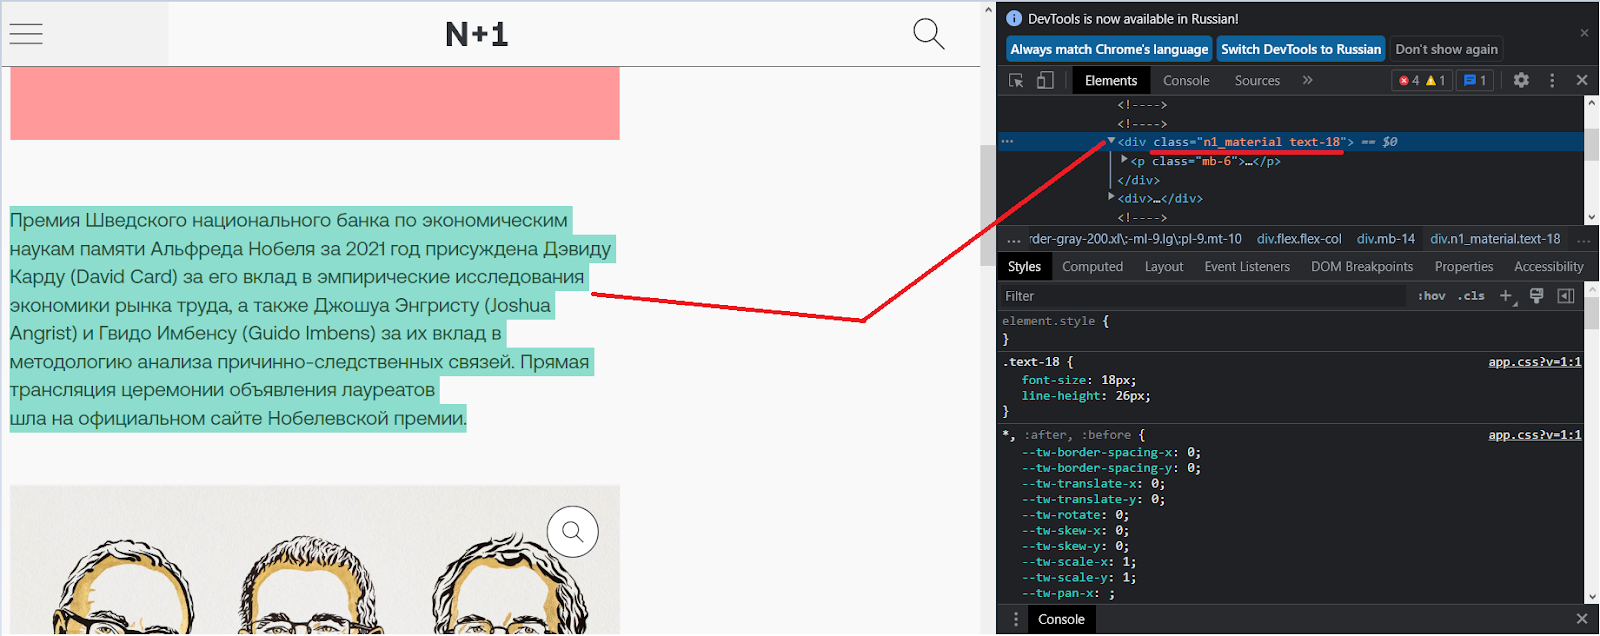

In [14]:
print(page.find('div', class_='n1_material text-18').text) # Выводим содержимое атрибута text тега div класса n1_material text-18

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


В данном случае происходит поиск точного строкового значения class атрибута, т. е. выполнение строк кода:

In [15]:
print(page.find('div', class_='n1_material').text)
print(page.find('div', class_='n1_material text-18').text)

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.
Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


In [16]:
print(page.find('div', class_='text-18 n1_material').text)

AttributeError: 'NoneType' object has no attribute 'text'

мы получим ошибку, так как такого строкового значения в области поиска нет.

Аналогично получим информации о теге, который содержит дату написания статьи, отображаемую в левом верхнем углу страницы.

Теперь выведем дату статьи

In [16]:
print(page.find('a', class_="relative before:block before:w-px before:bg-current before:h-4 before:absolute before:left-0 group pl-2 flex inline-flex items-center").text)


11.10.21



[Больше о поиске по классу](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-by-css-class)

## Сбор нескольких элементов: собираем все ссылки на странице
Рассмотрим ещё один сценарий: вы хотите собрать сразу несколько элементов со страницы. Например, представьте, что вы хотите получить названия всех языков программирования, упомянутых на [странице](https://en.wikipedia.org/wiki/List_of_programming_languages) в Wikipedia в статье про языки программирования.

Можно заметить, что все названия языков программирования на этой странице связаны ссылками c соответствующими статьями о них. Таким образом, нам необходимо собрать все ссылки на странице. Для ссылок в HTML предусмотрен тег <a> … </a>. Попробуем использовать find():

In [17]:
url = 'https://en.wikipedia.org/wiki/List_of_programming_languages' # Задаём адрес ресурса
response = requests.get(url) # Делаем GET-запрос к ресурсу
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
print(page.find('a')) # Ищем ссылку по тегу <a> и выводим её на экран

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>


Мы получили только одну ссылку, хотя на странице их явно больше.

Это происходит, потому что метод find() возвращает только первый подходящий элемент. Если требуется получить больше элементов, необходимо воспользоваться методом find_all() (с англ. найти все):

In [18]:
links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print(len(links)) # Выводим количество найденных ссылок

951


In [19]:
print([link.text for link in links[500:510]]) # Выводим ссылки с 500 по 509 включительно

['MAD', 'MAD/I', 'Magik', 'Magma', 'Maple', 'MAPPER', 'MARK-IV', 'Mary', 'MATLAB', 'MASM Microsoft Assembly x86']


In [20]:
print([link.text for link in links[0:10]]) # Выводим ссылки с 1 по 9 включительно

['Jump to content', 'Main page', 'Contents', 'Current events', 'Random article', 'About Wikipedia', 'Contact us', 'Help', 'Learn to edit', 'Community portal']


Не все ссылки соответствуют названиям языков программирования — страница содержит также «служебные» ссылки, такие, например, как Jump to navigation (с англ. Перейти к навигации) или Alphabetical (с англ. По алфавиту)

Для обработки полученных данных и исключения «лишней» информации можно, например, использовать подходы, которые вы изучили в модуле PYTHON-14.

[Документацияя Beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

# Работа с API
заходим на [страницу ВК для разработчиков](https://dev.vk.com/ru/admin/create-app), даём приложению название, переходим в раздел разработка - ключи доступа
Смотрим сервисный ключ и далее переходим по следующей ссылке, подставив вместо слова TOKEN сам токен:
https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=TOKEN
результат запроса:
```
{
    "response": [
        {
            "id": 1,
            "first_name": "Pavel",
            "last_name": "Durov",
            "can_access_closed": true,
            "is_closed": false
        }
    ]
}
```

Итак, мы сделали GET-запрос к API ВКонтакте, который состоит из следующих элементов:

* https://api.vk.com/method — домен и URL запроса API; обычно не меняется;
* users.get — название метода, который отдаёт определённый отчёт, в нашем случае это метод для получения информации о пользователе;
* user_id и v — параметры запроса: идентификатор пользователя, о котором хотим получить информацию (в нашем примере мы запрашиваем информацию о первом пользователе), и номер версии API;
* token — токен, который выдаётся только пользователям, имеющим право просматривать определённые данные, например показания счётчиков Яндекс.Метрики вашего проекта; на все остальные запросы без корректного токена система отвечает отказом.

Если мы обратимся к[документации](https://dev.vk.com/ru/method/users.get?ref=old_portal) метода users.get, то увидим, что в ней описано множество других параметров, которые можно получить о пользователе (дата рождения, пол, родной город и другие) — словом, всё то, что мы видим на странице пользователя в интерфейсе или приложении ВКонтакте (конечно, если пользователь их указал).

Добавим ещё несколько параметров к нашему запросу

https://api.vk.com/method/users.get?user_id=1&v=5.95&fields=sex,bdate&access_token=TOKEN

{
    "response": [
        {
            "id": 1,
            "bdate": "10.10.1984",
            "sex": 2,
            "first_name": "Pavel",
            "last_name": "Durov",
            "can_access_closed": true,
            "is_closed": false
        }
    ]
}

## Запрос к API из кода

In [3]:
import requests # Импортируем модуль requests
token = '6a22c2316a22c2316a22c231f26905efc566a226a22c2310d59accb38bfdc6af2aadab6' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
params = {'user_id': 1, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'} # Перечисляем параметры нашего запроса в словаре params
response = requests.get(url, params=params) # Отправляем запрос
print(response.text) # Выводим текст ответа на экран

from pprint import pprint # Импортируем функцию pprint()
pprint(response.json()) # Выводим содержимое словаря, содержащего ответ, на экран

{"response":[{"id":1,"bdate":"10.10.1984","sex":2,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}
{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2}]}


In [4]:
user = response.json()['response'][0] # Извлекаем из словаря по ключу response информацию о первом пользователе
print(user['bdate']) # Выводим дату рождения первого пользователя на экран

10.10.1984


In [5]:
print(user['first_name'])

Павел


Метод users.get() позволяет запрашивать информацию о множестве (до 1 000) пользователей одновременно. Для этого нужно использовать параметр user_ids и передавать id через запятую в строковом формате. Например, чтобы получить информацию о пользователях с id=1, id=2, id=3, необходимо передать значение параметра user_ids='1,2,3'.

In [6]:
ids = ",".join(map(str, range(1, 4))) # Формируем строку, содержащую информацию о поле id первых трёх пользователей
params = {'user_ids': ids, 'v': 5.95, 'fields': 'bdate', 'access_token': token, 'lang': 'ru'} # Формируем строку параметров
pprint(requests.get(url, params=params).json()) # Посылаем запрос, полученный ответ в формате JSON-строки преобразуем в словарь и выводим на экран его содержимое, используя функцию pprint()

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров'},
              {'bdate': '14.2',
               'can_access_closed': False,
               'first_name': 'Александра',
               'id': 2,
               'is_closed': True,
               'last_name': 'Владимирова'},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'is_closed': False,
               'last_name': ''}]}


Задание 6.2
1 point possible (graded)
Используя API, определите долю женщин (sex=1) среди пользователей с id от 1 до 500. Иногда будут попадаться пользователи, у которых пол не указан (sex=0), — таких пользователей не нужно учитывать в общем числе.

В ответе укажите число, округлив до двух знаков после точки-разделителя, например, 0.55.


In [39]:
ids = ",".join(map(str, range(1, 500))) # Формируем строку, содержащую информацию о поле id первых трёх пользователей
params = {'user_ids': ids, 'v': 5.95, 'fields': 'bdate, sex', 'access_token': token, 'lang': 'ru'} # Формируем строку параметров
response = requests.get(url, params=params).json()
pprint(response)
def sex_count (dict):
    sex_1_count = 0
    sex_2_count = 0
    users = response['response']
    for user in users:
        if 'sex' not in user: pass
        elif user['sex'] == 1: sex_1_count += 1
        elif user['sex'] == 2: sex_2_count += 1
    return sex_1_count, sex_2_count
sex_count(response)

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2},
              {'bdate': '14.2',
               'can_access_closed': False,
               'first_name': 'Александра',
               'id': 2,
               'is_closed': True,
               'last_name': 'Владимирова',
               'sex': 1},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'is_closed': False,
               'last_name': '',
               'sex': 0},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 4,
               'is_closed': False,
               'last_name': '',
               'sex': 0},
              {'bdate': '18.11',
  

(205, 216)

In [42]:
sex0 = 500 - 216 - 205
205 / (500 - sex0)

0.48693586698337293

## Сбор информации из групп
Если мы попробуем выгрузить данные из группы ВК есть 2 основных ограничения, связанные практически с любыми API:
1) Количество запросов в единицу времени
2) количество выгружаемых строк за 1 запорос4

Попробуем собрать данные вот из этой группы: (https://vk.com/vk)

Обратимся к [документации](https://dev.vk.com/ru/?ref=old_portal), чтобы узнать какие методы доступны для групп. В данном случае чтобы получить список пользователей есть метод [groups.getMembers](https://dev.vk.com/ru/method/groups.getMembers?ref=old_portal)

In [2]:
import requests # Импортируем модуль requests
token = '6a22c2316a22c2316a22c231f26905efc566a226a22c2310d59accb38bfdc6af2aadab6' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
params = {'group_id': 'vk', 'v': 5.95, 'access_token': token} # Формируем строку параметров
response = requests.get(url, params = params) # Посылаем запрос
data = response.json() # Ответ сохраняем в переменной data в формате словаря
print(data) # Выводим содержимое переменной data на экран (отображён фрагмент)

{'response': {'count': 13732012, 'items': [6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550, 619, 640, 690, 702, 721, 804, 809, 832, 834, 847, 900, 905, 907, 914, 930, 943, 952, 958, 966, 976, 997, 1000, 1018, 1023, 1032, 1033, 1039, 1059, 1097, 1131, 1139, 1140, 1159, 1174, 1185, 1188, 1273, 1301, 1333, 1334, 1351, 1381, 1386, 1388, 1406, 1411, 1418, 1432, 1494, 1503, 1531, 1550, 1568, 1586, 1590, 1593, 1598, 1610, 1615, 1632, 1634, 1650, 1679, 1690, 1697, 1698, 1699, 1700, 1721, 1740, 1754, 1796, 1814, 1820, 1829, 1834, 1839, 1840, 1843, 1858, 1863, 1869, 1887, 1889, 1917, 1943, 1947, 1955, 1969, 2019, 2028, 2050, 2051, 2052, 2059, 2077, 2103, 2136, 2150, 2195, 2201, 2230, 2236, 2273, 2281, 2296, 2298, 2376, 2389, 2395, 2403, 2412, 2436, 2456, 2466, 2470, 2484, 2513, 2515, 2539, 2576, 2592, 2601, 2622, 2644, 2654, 2692, 2706, 2745, 2755, 2767, 2787, 2797, 2827, 2858, 2909, 2919, 2922, 2932, 2953, 2962, 2982, 3001, 3006, 3041, 3130, 3135, 31

о ключу count мы можем получить общее число участников группы, а список по ключу items хранит их id. Посмотрим на него поближе:

In [3]:
print(len(data['response']['items'])) # Выводим на экран количество элементов словаря

1000


Мы видим, что всего пользователей в группе больше 11 миллионов, а получили мы только первую тысячу пользователей группы. По информации, указанной в документации о параметре count, это максимум, который может отдать API за один раз.

Для получения следующей тысячи пользователей можно воспользоваться параметром offset (с англ. смещение), который передвинет начало отсчёта. Для выгрузки всех пользователей группы будем в цикле выгружать по 1000 пользователей (count будет всегда равен 1000), увеличивая смещение offset на величину count.

Для тренировки напишем цикл выгрузки первых 20 пользователей со значением count=5. Иными словами, мы будем выгружать по пять пользователей за запрос до тех пор, пока не получим информацию о 20 пользователях.

Давайте выведем на экран первые 20 пользователей из нашей первой попытки получить информацию о 1000 пользователей, чтобы мы могли сверить результат выгрузки из 20 пользователей:

In [4]:
users_for_checking = data['response']['items'][:20] # Загружаем в переменную информацию об id первых 20 пользователей в виде списка
print(users_for_checking) # Выводим перечень id первых 20 пользователей

[6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550]


In [5]:
import requests # Импортируем модуль requests
token = '6a22c2316a22c2316a22c231f26905efc566a226a22c2310d59accb38bfdc6af2aadab6'
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
count = 5 
offset = 0 
user_ids = [] 
max_count = 20 
while offset < max_count: 
    # Будем выгружать по count=5 пользователей, 
    # начиная с того места, где закончили на предыдущей итерации (offset) 
    print('Выгружаю {} пользователей с offset = {}'.format(count, offset))   
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    # Увеличиваем смещение на количество строк, которое мы уже выгрузили 
    offset += count 
print(user_ids) 

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[6, 19, 47, 54, 79, 177, 198, 212, 219, 243, 296, 345, 353, 421, 431, 450, 467, 485, 510, 550]


In [6]:
print(user_ids == users_for_checking) 

True


Так как результат сравнения — True, списки идентичны. Значит, второй способ работает корректно. Теперь мы можем получить данные обо всех пользователях, выставив count = 1000 и max_count = data['response']['count'].

## Ограничение по частоте запросов
Чтобы не следить за частотой отправки запросов с секундомером в руках, мы можем после каждого запроса делать паузу. В этом случае, даже если код будет выполняться на самом быстром компьютере, мы не нарушим установленное ограничение, так как периодичность отправки запросов будет искусственно замедлена.

Воспользуемся библиотекой time и методом sleep, с помощью которого мы можем добавить паузу, например в 0.5 секунд, после каждого запроса:

In [9]:
import requests # Импортируем модуль requests
import time
token = '6a22c2316a22c2316a22c231f26905efc566a226a22c2310d59accb38bfdc6af2aadab6'
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес страницы, к которой делаем запрос
count = 1000 
offset = 0  
user_ids = []  
while offset < 5000: 
    params = {'group_id': 'vk', 'v': 5.95, 'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    offset += count 
    print('Ожидаю 0.5 секунды...') 
    time.sleep(0.5) 
print('Цикл завершен, offset =',offset) 

Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Цикл завершен, offset = 5000


## Лайки, репосты и комментарии
Через API новостной ленты ВКонтакте мы можем получить информацию о взаимодействии с сообщениями в ленте.

Для примера продолжим работать с группой https://vk.com/vk и рассмотрим последние 100 сообщений в новостной ленте.
Для получения информации о сообщениях на стене в API ВКонтакте предусмотрен метод wall.get. Применим его:

In [11]:
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()
token = '6a22c2316a22c2316a22c231f26905efc566a226a22c2310d59accb38bfdc6af2aadab6'
url = 'https://api.vk.com/method/wall.get' # Указываем адрес страницы, к которой делаем запрос
params = {'domain': 'vk', 'filter': 'owner', 'count': 1000, 'offset': 0, 'access_token': token, 'v': 5.95} 
response = requests.get(url, params = params) 
pprint(response.json()) 

{'response': {'count': 794,
              'items': [{'attachments': [{'photo': {'access_key': '5f4bdc182c605a09c8',
                                                    'album_id': -7,
                                                    'date': 1735376116,
                                                    'id': 457358577,
                                                    'orig_photo': {'height': 2560,
                                                                   'type': 'base',
                                                                   'url': 'https://sun6-21.userapi.com/s/v1/ig2/SZjHrkR8aaXY8k3zCXWHrIHdaF62q__T4YUqjk5MPSnkRsn9-_3OSLzkwpoVkGvU6mvZJEW2lTm-OT1hJpc495qe.jpg?quality=95&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720,1080x1080,1280x1280,1440x1440,2560x2560&from=bu',
                                                                   'width': 2560},
                                                    'owner_id': -22822305,


In [12]:
len(response.json()['response']['items'])

100

In [14]:
response.json()['response']['items'][0]

{'inner_type': 'wall_wallpost',
 'comments': {'count': 1447},
 'marked_as_ads': 0,
 'hash': 'H0Gif3l2Rw1YAvdHPA',
 'type': 'post',
 'push_subscription': {'is_subscribed': False},
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1735376116,
    'id': 457358577,
    'owner_id': -22822305,
    'access_key': '5f4bdc182c605a09c8',
    'post_id': 1567536,
    'sizes': [{'height': 75,
      'type': 's',
      'width': 75,
      'url': 'https://sun6-21.userapi.com/s/v1/ig2/SZjHrkR8aaXY8k3zCXWHrIHdaF62q__T4YUqjk5MPSnkRsn9-_3OSLzkwpoVkGvU6mvZJEW2lTm-OT1hJpc495qe.jpg?quality=95&as=32x32,48x48,72x72,108x108,160x160,240x240,360x360,480x480,540x540,640x640,720x720,1080x1080,1280x1280,1440x1440,2560x2560&from=bu&cs=75x75'},
     {'height': 130,
      'type': 'm',
      'width': 130,
      'url': 'https://sun6-21.userapi.com/s/v1/ig2/SZjHrkR8aaXY8k3zCXWHrIHdaF62q__T4YUqjk5MPSnkRsn9-_3OSLzkwpoVkGvU6mvZJEW2lTm-OT1hJpc495qe.jpg?quality=95&as=32x32,48x48,72x72,108x108,160x160,24

Давайте соберём итоговую статистику для последних десяти непустых сообщений в словарь stats. В качестве ключа будем использовать начало сообщения (если начало сообщения пустое, то информацию о таком сообщении проигнорируем), в качестве значения — список с тремя интересующими нас метриками и временем публикации (комментарии, лайки, репосты, дата публикации):

In [15]:
stats = {} 
count_post = 0 # Счётчик «непустых» сообщений
for record in response.json()['response']['items'][:]:
    title = record['text'][:30] 
    if title: 
        stats[title] = [record['comments']['count'], record['likes']['count'], record['reposts']['count'], record['date']] 
        count_post += 1 
    if count_post < 10: 
        continue 
    else: 
        break 
pprint(stats)

{'Бу, испугались? Не бойтесь, гл': [970, 1211, 389, 1734956122],
 'Ваши личные итоги года ВКонтак': [1268, 1087, 1940, 1735047251],
 'Вдохновляемся вашими [vk.com/m': [497, 566, 112, 1734696915],
 'Зимний [https://vk.com/app5160': [1208, 529, 72, 1735373473],
 'И опять про итоги — [https://v': [1504, 791, 237, 1733909421],
 'На часах 20:25 — самое время в': [656, 516, 111, 1735320240],
 'Новогоднее настроение уже стуч': [869, 728, 90, 1735196706],
 'Новый год уже очень скоро, а з': [6317, 1253, 279, 1734010232],
 'С Новым 2025 годом! ✨\n\nЖелаем ': [1447, 1644, 125, 1735635623],
 'Хотите узнать, что ждёт вас в ': [1540, 758, 114, 1734708652]}


Для каждого ресурса есть своя API документация, найти которую можно оналйн

# Как настроить регулярную выгрузку данных
## Скрипты
Как уже говорилось, скриптом принято называть небольшую компьютерную программу, которая автоматизирует выполнение некоторой задачи. Программы, которые мы создаём на языке Python, также являются скриптами.

* Eсли вам нужно выполнить код один раз или выполнять его очень редко (от случая к случаю), вы можете запустить скрипт вручную из командной строки.
* Если вы, например, написали на Python серверную часть веб-сайта и хотите, чтобы ваш код мог в любое время обрабатывать запросы, вы захотите запустить его как фоновый процесс.

Если же нужно, чтобы скрипт запускался при каких-то конкретных условиях, то нужен автоматический запуск скриптов или запуск по крону (Cron)

Автоматический запуск может понадобиться, например:

* если вы хотите с определённой периодичностью скачивать новую информацию с сайтов, например выполнять парсинг новостей для последующего анализа (как мы уже знаем, этот процесс называется web-scraping);
* если ваш скрипт должен следить за курсом акций и каждую минуту делать запрос по API, чтобы получить новые котировки;
* если вы написали обучающую платформу и вам нужно каждый час проверять, кто из студентов приступил к занятиям и насколько успешно продвигается их обучение;
* если у вас есть 500 вендинговых автоматов по продаже солнечных очков и каждые пять минут вы должны опрашивать все автоматы, чтобы узнать, не закончились ли очки.

## Как настроить автоматический запуск
Во всех операционных системах есть встроенные средства запуска программ по расписанию. Однако можно задать расписание запуска необходимых вам функций на языке Python внутри скрипта.

Исполняемый по расписанию код часто называют задачей (англ. task). Для планирования задач в Python есть несколько библиотек, среди которых — популярный и простой в использовании модуль schedule (c англ. расписание). Он позволяет запускать код как с определённым интервалом, так и в заданное время.

Модуль schedule не входит в стандартную библиотеку Python, поэтому его необходимо установить:
pip install schedule 

In [16]:
import schedule

## Постановка задачи
Рассмотрим вариант автоматического запуска простой функции, которая выводит на экран короткое сообщение:

In [17]:
def task(): 
    print('Hello! I am a task!') 
    return

Предположим, что мы хотим, чтобы функция запускалась через определённые интервалы времени, а именно каждые 15 минут.

Для запуска задачи через определённые интервалы времени в модуле schedule используется метод every(), который получает в качестве единственного аргумента число, указывающее, как часто следует запускать код.

Далее вызывается метод, определяющий единицы измерения промежутков времени, через которые будет выполняться функция. В нашем примере это минуты. Вот как будет выглядеть итоговый код:

In [19]:
schedule.every(15).minutes.do(task)
schedule.every(1).hour.do(task) 

Every 1 hour do task() (last run: [never], next run: 2025-01-06 16:21:57)

## Выполнение функции
После того как мы создали нашу функцию и определились со временем её запуска, мы можем запустить наш менеджер расписания (schedule). Для этого надо создать бесконечный цикл. Да-да, именно так, ведь скрипт должен выполняться постоянно, чтобы постоянно проверять, не пришло ли время снова выполнить задачу.

Внутри цикла мы будем вызывать особый метод run_pending() для объекта schedule, который будет проверять, нет ли задачи, которую пора выполнить.

После вызова метода run_pending() нужно будет сделать небольшую паузу, после которой можно будет снова проверять, не пришло ли время для выполнения какой-либо функции.

Давайте напишем этот код.

Для создания паузы мы будем использовать метод sleep из модуля time, поэтому наш код начнётся с импорта данного модуля:

In [22]:
import schedule

def task(): 
    print('Hello! I am a task!') 
    return

schedule.every(10).seconds.do(task)

import time 
while True: 
    schedule.run_pending() 
    time.sleep(1)

Hello! I am a task!
Hello! I am a task!


KeyboardInterrupt: 